In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Readers data</p>

In [2]:
df=pd.read_csv("/kaggle/input/student-performance-predictions/student_performance.csv")

In [3]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">describe in data</p>

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StudentID,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
AttendanceRate,10.0,85.6,7.441625,70.0,82.75,86.5,90.75,95.0
StudyHoursPerWeek,10.0,17.7,6.848357,8.0,12.75,17.5,21.50,30.0
PreviousGrade,10.0,78.1,10.170218,60.0,71.75,80.0,85.75,90.0
ExtracurricularActivities,10.0,1.5,1.080123,0.0,1.00,1.5,2.00,3.0
FinalGrade,10.0,80.2,10.097304,62.0,73.50,82.5,87.75,92.0


# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Showing relationships in data</p>

<Axes: xlabel='PreviousGrade', ylabel='FinalGrade'>

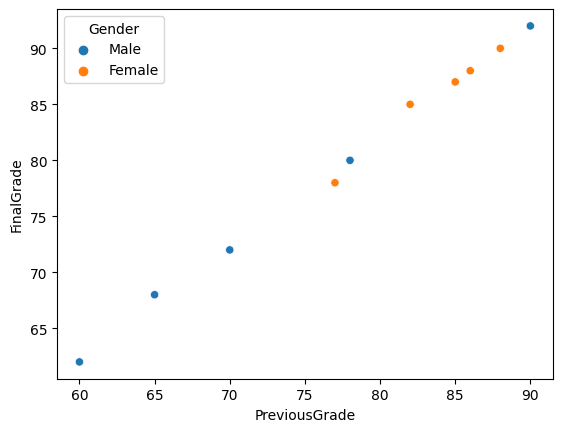

In [5]:
sns.scatterplot(data=df,x='PreviousGrade',y='FinalGrade',hue='Gender')

# The higher the PreviousGrade, the better the FinalGrade tends to be, with female students often achieving higher marks.

<Axes: xlabel='ParentalSupport', ylabel='FinalGrade'>

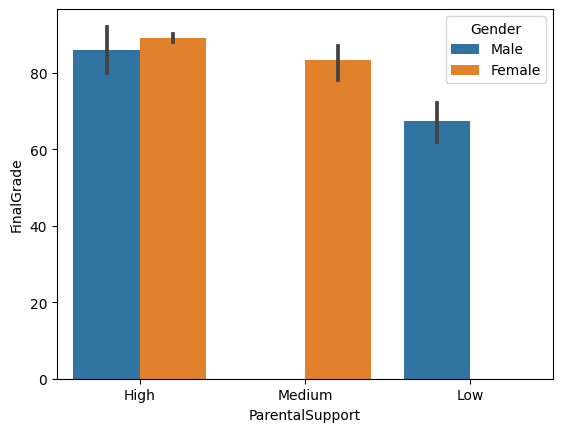

In [6]:
sns.barplot(data=df,x='ParentalSupport',y='FinalGrade',hue='Gender')

# Students tend to have the lowest scores when ParentalSupport is low.

<Axes: xlabel='AttendanceRate', ylabel='StudyHoursPerWeek'>

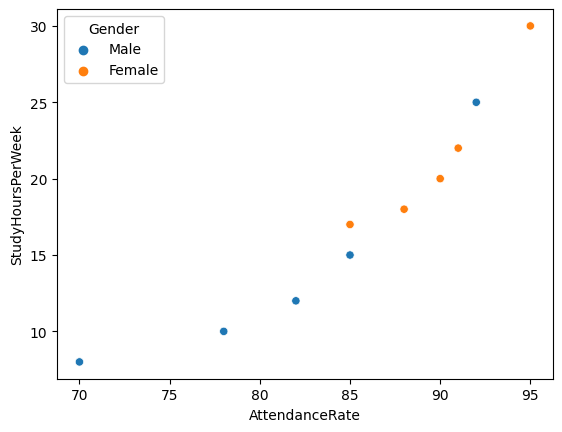

In [7]:
sns.scatterplot(data=df,x='AttendanceRate',y='StudyHoursPerWeek',hue='Gender')

<Axes: xlabel='StudyHoursPerWeek', ylabel='FinalGrade'>

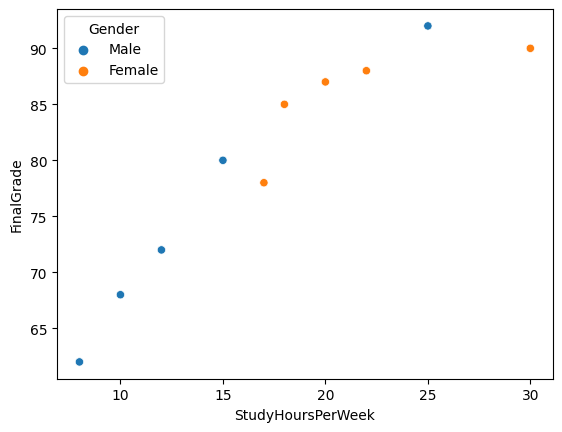

In [8]:
sns.scatterplot(data=df,x='StudyHoursPerWeek',y='FinalGrade',hue='Gender')

# The more StudyHours PerWeek students put in, the higher their scores tend to be.


# null value

In [9]:
def null(df):
    g=df.isnull().sum()
    f=pd.Series(g)
    return g


null(df)

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

 # <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">label_Encoding</p>

In [10]:
ParentalSupport_label_Encoding={
    "Low":0,
    "Medium":1,
    "High":2
}
df['ParentalSupport']=df['ParentalSupport'].map(ParentalSupport_label_Encoding)
df['ParentalSupport']

0    2
1    1
2    0
3    2
4    1
5    2
6    0
7    1
8    0
9    2
Name: ParentalSupport, dtype: int64

In [11]:
Gender_label_Encoding={
    "Male":0,
    "Female":1
}
df['Gender']=df['Gender'].map(Gender_label_Encoding)
df['Gender']

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Gender, dtype: int64

In [12]:
df=df.drop(['StudentID',"Name"],axis=1)

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">heatmap</p>

<Axes: >

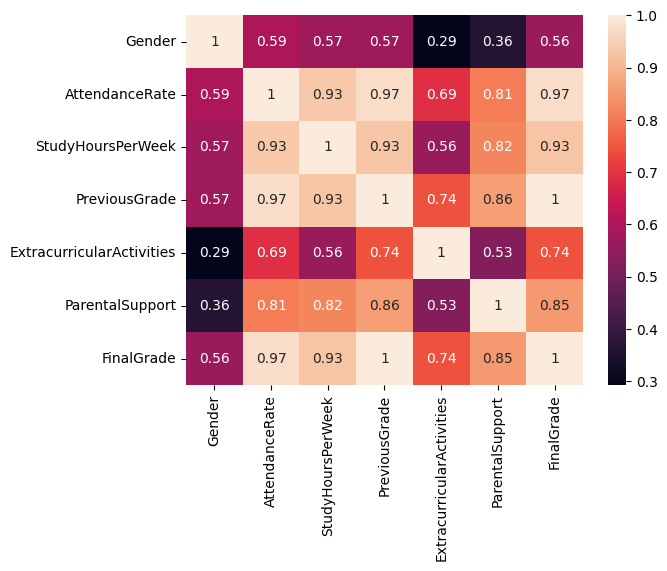

In [13]:
sns.heatmap(df.corr(),annot=True)

# To avoid overfitting, it's recommended to remove features with strong correlations like PreviousGrade, AttendanceRate, StudentID, and Name from the model.


In [14]:
df=df.drop(['AttendanceRate','PreviousGrade'],axis=1)

In [15]:
df

,Gender,StudyHoursPerWeek,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,15,1,2,80
1,1,20,2,1,87
2,0,10,0,0,68
3,0,25,3,2,92
4,1,18,2,1,85
5,1,30,1,2,90
6,0,8,0,0,62
7,1,17,1,1,78
8,0,12,2,0,72
9,1,22,3,2,88


# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Train and test split/p> 

In [16]:
x=df.drop('FinalGrade',axis=1)
y=df['FinalGrade']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Scaler in data</p> 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">build model/p> 

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Evaluation</p>  


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
pred_y=model.predict(x_test)

In [24]:
pred_y

array([73.77195434, 83.29163755])

In [25]:
print("MSE = ",mean_absolute_error(y_test,pred_y))
print("RMSE  = ",np.sqrt(mean_squared_error(y_test,pred_y)))
print("R2  = ",r2_score(y_test,pred_y))

MSE =  2.740158397391099
RMSE  =  2.906180849715144
R2  =  0.849850895444426


In [26]:
pred_train=model.predict(x_train)

In [27]:
print("MSE = ",mean_absolute_error(y_train,pred_train))
print("RMSE  = ",np.sqrt(mean_squared_error(y_train,pred_train)))
print("R2  = ",r2_score(y_train,pred_train))

MSE =  1.5439669228977433
RMSE  =  1.9266178942900565
R2  =  0.9630603612691162
